# This Model Predicts whether a person has Coronavirus or not based on the dummy data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
df = pd.read_csv("Dataset.csv")
df.head(6)

,cough,cold,diarrhea,sore_throat,body_pain,headache,temperature,difficult_breathing,fatigue,travelled14,travel_covid,covid_contact,age,infection_probability
0,0,0,1,1,1,0,1,0,0,3,0,0,2,0
1,0,1,0,0,0,1,0,0,0,0,0,3,2,0
2,1,1,0,0,0,0,0,0,0,0,0,3,2,0
3,0,1,0,1,1,0,0,2,2,0,0,3,0,0
4,0,1,1,0,0,1,1,0,2,3,3,0,2,1
5,0,1,0,0,0,1,0,0,2,3,3,3,2,1


In [47]:
df.shape

(5005, 14)

In [48]:
df["infection_probability"].value_counts()

0    3336
1    1669
Name: infection_probability, dtype: int64

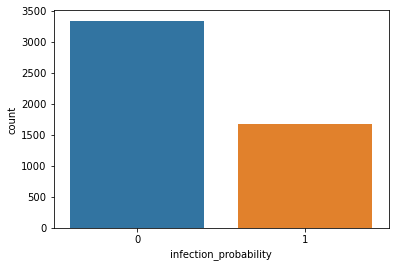

In [49]:
sns.countplot(df["infection_probability"])

In [50]:
df.describe()

,cough,cold,diarrhea,sore_throat,body_pain,headache,temperature,difficult_breathing,fatigue,travelled14,travel_covid,covid_contact,age,infection_probability
count,5005.00000,5005.000000,5005.00000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,0.50050,0.515485,0.50010,0.494306,0.492707,0.491109,0.503497,0.989810,0.974625,1.512288,1.479920,1.512288,1.004995,0.333467
std,0.50005,0.499810,0.50005,0.500018,0.499997,0.499971,0.500038,1.000048,0.999778,1.500100,1.500015,1.500100,1.000087,0.471499
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,3.000000,2.000000,0.000000
75%,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000
max,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000


In [51]:
df.isna().sum()

cough                    0
cold                     0
diarrhea                 0
sore_throat              0
body_pain                0
headache                 0
temperature              0
difficult_breathing      0
fatigue                  0
travelled14              0
travel_covid             0
covid_contact            0
age                      0
infection_probability    0
dtype: int64

# Split the dataset into independent (X) and dependent (Y)

In [67]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

# Spliting Dataset into training and testing samples

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [69]:
X_train


array([[1, 0, 1, ..., 3, 0, 2],
       [0, 1, 0, ..., 3, 3, 0],
       [1, 0, 0, ..., 3, 3, 0],
       ...,
       [1, 1, 1, ..., 3, 3, 2],
       [0, 0, 0, ..., 0, 3, 2],
       [1, 0, 1, ..., 0, 0, 2]], dtype=int64)

# Creating Models (Logistic , Decision , Random Forest )

In [70]:
# Create a function for the models


def models(X_train,Y_train):
    
    # Logistic Regression
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    
    # Decision Tree Classifier
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy" , random_state=0)
    tree.fit(X_train,Y_train)
    
    # Random Forest Classifier
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10 , criterion = "entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    # Print the models accuracy on the training data
    
    print('[0] Logistic Regression Training Accuracy : ',log.score(X_train,Y_train))
    print('[1] Decision Tree Classifier Training Accuracy : ',tree.score(X_train,Y_train))
    print('[2] Random Forest Classifier Training Accuracy : ',forest.score(X_train,Y_train))
    
    return log,tree,forest
    
    

In [71]:
# Getting all the models

model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy :  1.0
[1] Decision Tree Classifier Training Accuracy :  1.0
[2] Random Forest Classifier Training Accuracy :  0.9972527472527473


# Testing Model Accuracy by Confusion Matrix

In [72]:
# Test model accuracy on test data on Confusion matrix

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    print("Model ", i)
    
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    # [[true_negative , false_postive] [false_negative,true_positive]]
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    print(cm)
    print("Testing Accuracy =  ",(TP + TN)/(TP + TN + FN + FP))
    print()



Model  0
[[670   0]
 [  0 331]]
Testing Accuracy =   1.0

Model  1
[[630  40]
 [ 36 295]]
Testing Accuracy =   0.9240759240759241

Model  2
[[646  24]
 [ 35 296]]
Testing Accuracy =   0.9410589410589411



# Testing accuracy by another method

In [73]:
# Show another way to get metrices of the models

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


for i in range(len(model)):
    print("Model ", i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(accuracy_score(Y_test,model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       670
           1       1.00      1.00      1.00       331

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

1.0

Model  1
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       670
           1       0.88      0.89      0.89       331

    accuracy                           0.92      1001
   macro avg       0.91      0.92      0.91      1001
weighted avg       0.92      0.92      0.92      1001

0.9240759240759241

Model  2
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       670
           1       0.93      0.89      0.91       331

    accuracy                           0.94      1001
   macro avg       0.94      0.93      0.93      1001
weighted avg       0.9

In [60]:
# Print the prediction of Random Forest Classifier Model

pred = model[0].predict(X_test[1:100])
print(pred)
print()
print(Y_test[1:100])

[0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0]

[0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0]


# Saving Models ( Logistic Regression )

In [74]:
def  SaveModel():
    import pickle
    with open("Coronavirus_logistic","wb") as f:
        pickle.dump(model[0],f)

In [75]:
SaveModel()

In [76]:
import pickle
with open("Coronavirus_logistic","rb") as f:
    logisticRegression = pickle.load(f)

pred = logisticRegression.predict(X_test[1:100])
print(pred)
print()
print(Y_test[1:100])

[0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0]

[0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0]


In [78]:
model_inputs = [0,0,1,1,1,0,1,0,0,3,0,0,2]
model_inputs1 = [0,1,0,0,0,1,0,0,2,3,3,3,2]


pred = logisticRegression.predict([model_inputs1])
print(pred)

[1]
